1. 고주파, 저주파를 활용한 이미지 작업 분리를 할 수 있다.
2. 주파수를 이용한 색상의 분포 및 밝기를 판별할 수 있다

푸리에 
- 주기적인 파형에 대해서만 사용할 수 있는 푸리에 급수 전개를 비주기적인 파형에 대하여 사용할 수 있는 형태로 변경하는 것
- 급수 전개
    - 임의의 주기함수는 다양한 주파수의 삼각함수의 합에 의해 나타낸다
    - 각각의 삼각함수의 진폭은 삼각함수의 직교성을 이용하면 간단히 구할 수 있다.

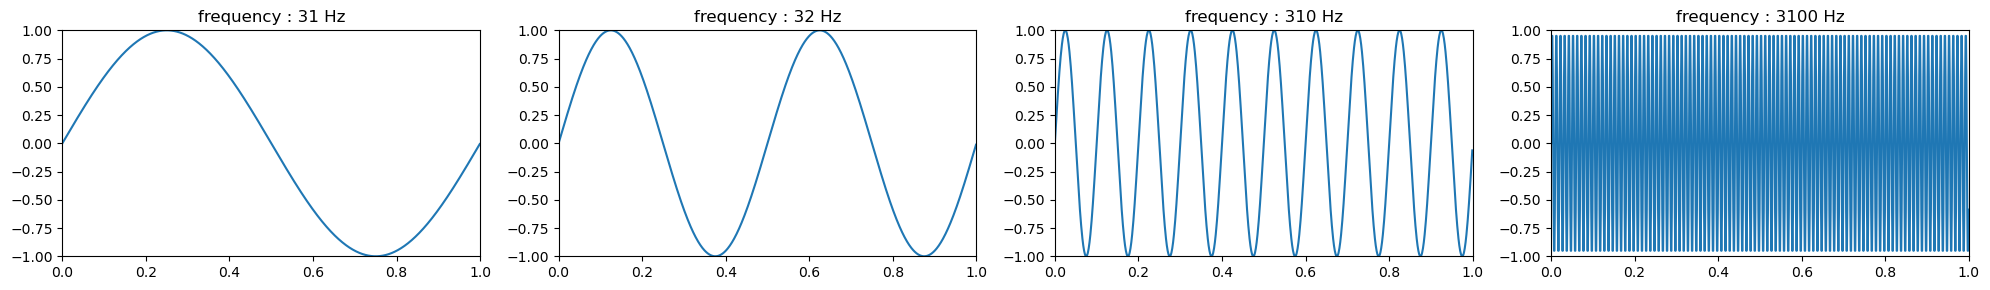

In [2]:
#1 간단한 공간 주파수를 일반 이미지로 그려서 확인
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,1,0.001)

hz =[1,2,10,100]
res = [np.sin(2*np.pi*t*h) for h in hz]

plt.figure(figsize=(20,3))
for i, j in enumerate(res):
    plt.subplot(1,4,i+1),plt.plot(t,j)
    plt.xlim(0,1),plt.ylim(-1,1)
    plt.title("frequency : 3%d Hz" % hz[i])
plt.tight_layout()
plt.show()

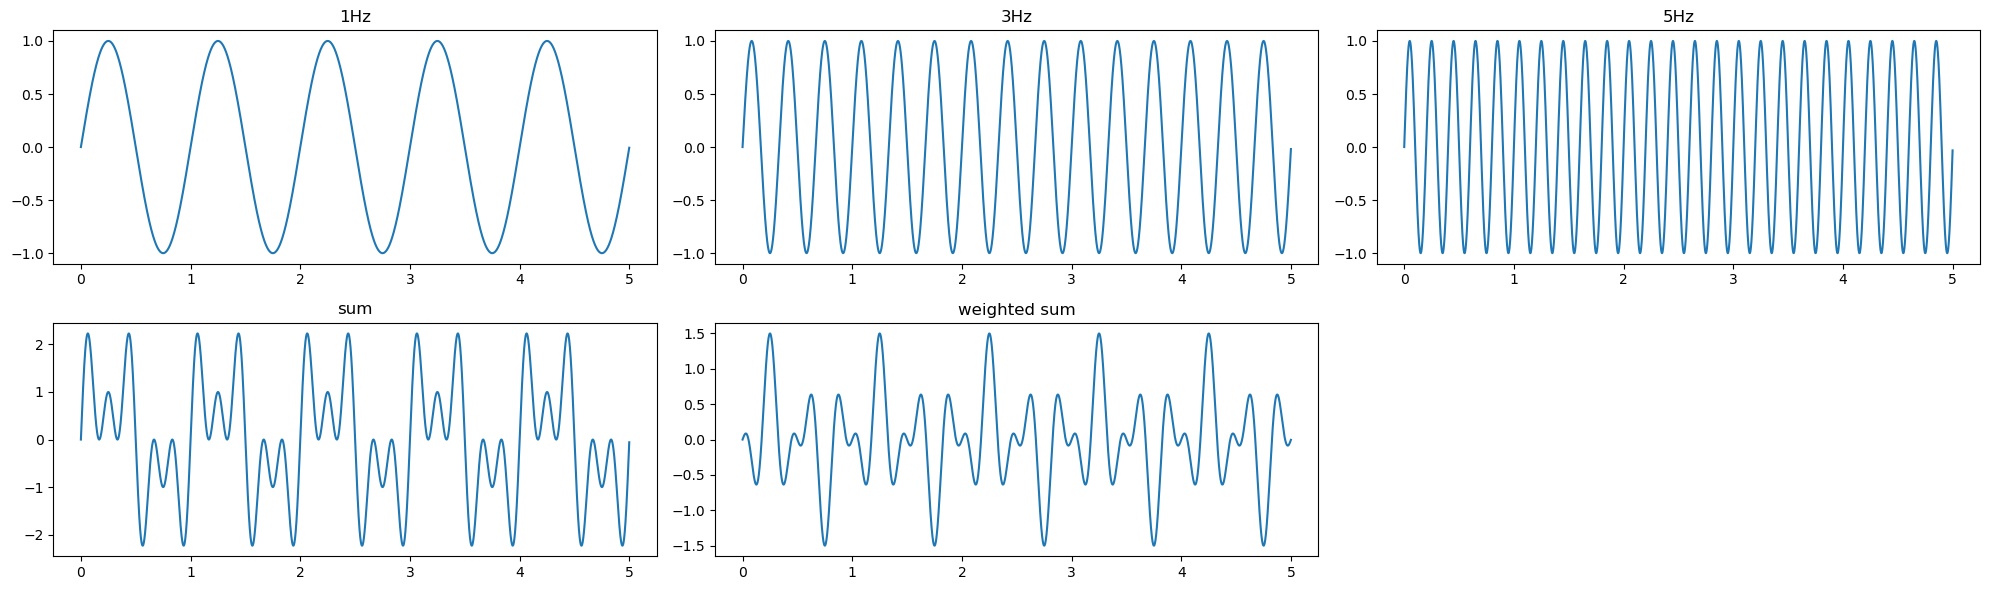

In [4]:
#1 간단한 공간 주파수를 일반 이미지로 그려서 확인
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,5,0.001)
res = [0] *5

res[0]=np.sin(2*np.pi*t)
res[1]=np.sin(2*np.pi*t*3)
res[2]=np.sin(2*np.pi*t*5)

#정현파 합산
res[3]=res[0]+res[1]+res[2]

res[4]=0.3*res[0]-0.7*res[1]+0.5*res[2]

titles = ['1Hz','3Hz','5Hz','sum','weighted sum']


plt.figure(figsize=(20,6))
for i, title in enumerate(titles):
    plt.subplot(2,3,i+1),plt.plot(t,res[i]),plt.title(title)
plt.tight_layout()
plt.show()

영상을 주파수로 변환하면 ?  

주파수는 단위 시간에 몇 번의 변화가 일어났는지를 표현하는 방법.  

화소의 밝기로 적용하면 영상에서 화소 밝기의 변화가 얼마나 빨리 변화하는가에 따라서 고주파와 저주파로 분류할 수 있다.  

1) dft= cv2.dft(src, flags=cv2.DFT_COMPLEX_OUTPUT) -> 이산 푸리에 변환(Discrete Fourier Transform, DFT)을 수행
2) np.fft.fftshift(dft)  -> FFT(Fast Fourier Transform) 결과의 제로 주파수(Zero Frequency) 부분을 배열의 중앙으로 이동시킴
3) cv2.magnitude(dft[:, :, 0], dft[:, :, 1])  : 2차원 벡터의 크기(매그니튜드)를 계산 -> 복소수 크기 계산 -> 주파수 성분의 강도를 확인하고 , 이미지의 스펙트럼을 시각화 시킬때 사용

   - dft[:, :, 0]: 복소수 결과의 실수부
   - dft[:, :, 1]: 복소수 결과의 허수부

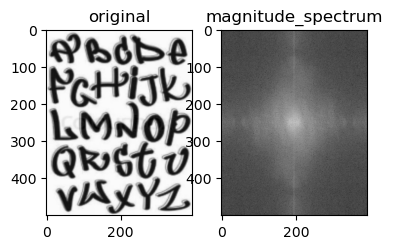

In [16]:
#이미즈를 푸리에 적용해보자 -> 적용후 영상을 확인 해보자 pdf pag.14
#!pip install opencv-python
#!pip install opencv-contrib-python

import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('img/letters.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
height,width = gray.shape
#print(height,width)

###### 코드 추가
dft= cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)


#주파수가 0인 값은 정 중앙에 위치 시키고, 주파수가 커질수록 가장자리에 위치시킨다.
dft_shift = np.fft.fftshift(dft) #주파수 재배열

magnitude_spectrum=20* np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

#print(magnitude_spectrum)


###### 시각화 추가
plt.subplot(131)
plt.imshow(gray,cmap='gray')
plt.title('original')

plt.subplot(132)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('magnitude_spectrum')

plt.show()

#주파수 확인!!!!
# 가운데가 밝은 것을 확인 = 영상이 저주파가 많다
# 밝기의 변화가 급격하게 일어나지 않는다 = 대상이 큰객체의 윤곽선
# 만일 '밝기 변화가 글지일 경우 급격하다'라고 판단되면 글자에 잡음이 많다라고 판단

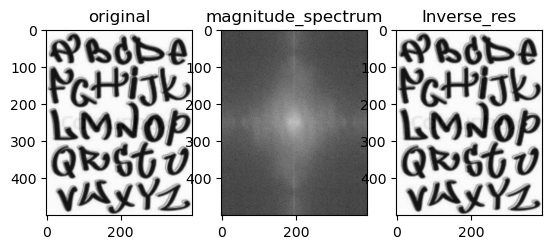

In [19]:
#이미즈를 푸리에 적용해보자 -> 적용후 영상을 확인 해보자 pdf pag.14 -> 역변환 해보자 
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('img/letters.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
height,width = gray.shape
#print(height,width)

###### 코드 추가
dft= cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft) #주파수 재배열
magnitude_spectrum=20* np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

### 주파수 반대 적용 코드 추가 -> 역 푸리에 변환 (Inverse Fourier Transform)
Inverse_dft_shift = np.fft.fftshift(dft_shift) #재배열된 주파수를 원래 배열로 변환
Inverse_dft =cv2.dft(np.float32(Inverse_dft_shift), flags=cv2.DFT_INVERSE)

Inverse_res = cv2.magnitude(Inverse_dft[:, :, 0], Inverse_dft[:, :, 1])

###### 시각화 추가
plt.subplot(131)
plt.imshow(gray,cmap='gray')
plt.title('original')

plt.subplot(132)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('magnitude_spectrum')


plt.subplot(133)
plt.imshow(Inverse_res,cmap='gray')
plt.title('Inverse_res')

plt.show()

#주파수 확인!!!!
# 가운데가 밝은 것을 확인 = 영상이 저주파가 많다
# 밝기의 변화가 급격하게 일어나지 않는다 = 대상이 큰객체의 윤곽선
# 만일 '밝기 변화가 글지일 경우 급격하다'라고 판단되면 글자에 잡음이 많다라고 판단

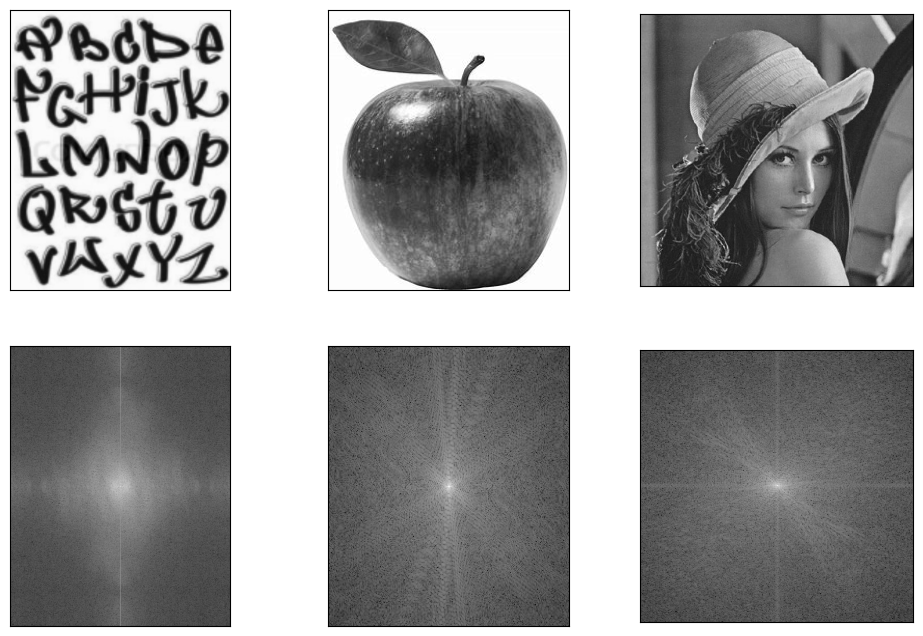

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('img/letters.jpg',0)
img01 = cv2.imread('img/apple.jpg',0)
img02 = cv2.imread('img/Lenna.jpg',0)

fig,ax = plt.subplots(2,3,figsize=(12,8))

imgs = [img,img01,img02]

for i in range(3):
    dft= cv2.dft(np.float32(imgs[i]), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft) #주파수 재배열
    magnitude_spectrum=20* np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
    
    ### 이미지원본
    ax[0][i].imshow(imgs[i],cmap='gray')
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    
    ### 스펙트럼 이미지
    ax[1][i].imshow(magnitude_spectrum,cmap='gray')
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    
    
###### 이미지 판별
# 1. 각 이미지는 저주파 성분이 강하다
# 2. 손글씨는 수직 방향의 패턴변화가 있다고 판단, 큰 밝기 변화없이 주파수 성분이 약하다라고 판단
# 3. 사과는 중심에 밝은 점, 저주파 강하다. 미세한 주름 패턴과 줄무늬가 있다. -> 고주파 정보가 포함되어 있다.